In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig_dir = "../manuscript/figs/"

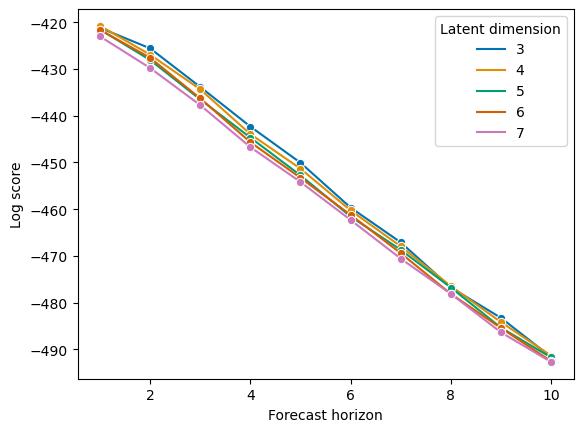

In [10]:
score = pd.read_csv("../trainedModels/results/results-230126.csv")

score = score.loc[score['latent_dim']<8]
score = score.loc[score['latent_dim']>2]
score['latent_dim'] = score['latent_dim'].astype('str')

score['Log score'] = score['Log score']*(-1)
score  = score[['latent_dim','Forecast horizon','Log score']].groupby(['latent_dim','Forecast horizon']).mean().reset_index()

sns.set_palette("colorblind")

sns.lineplot(x = 'Forecast horizon', y = 'Log score', hue = 'latent_dim', data = score, marker='o')
plt.legend(title = "Latent dimension")

fig_path = fig_dir + 'latent_dim_comparison.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi = 300)


In [11]:
score = pd.read_csv("../trainedModels/results/results-230126.csv")
score['Model'] = 'VI'
score_sat_naive = pd.read_csv("../trainedModels/results/results_naive_saturated.csv")
score = pd.concat([score,score_sat_naive])
score = score.loc[score['latent_dim']<8]
score = score.loc[score['latent_dim']>2]
score['Log score'] = - score['Log score']
score['latent_dim'] = score['latent_dim'].astype('str')
score  = score[['latent_dim','Forecast horizon','Log score','Model']].groupby(['latent_dim','Forecast horizon','Model']).mean().reset_index()
score = score.pivot(index = ['latent_dim', 'Forecast horizon'], columns='Model', values = 'Log score').reset_index()
score['R2'] = (score['VI']-score['naive'])/(score['saturated']-score['naive'])
score['relative'] = score['VI']/score['saturated']


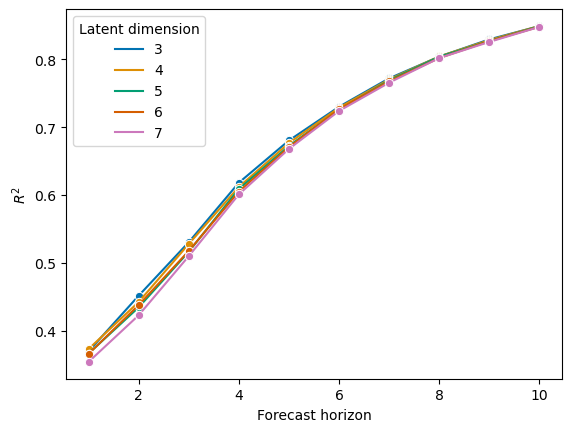

In [12]:
sns.set_palette("colorblind")

sns.lineplot(x = 'Forecast horizon', y = 'R2', hue = 'latent_dim', data = score, marker = 'o')
plt.legend(title = "Latent dimension")
plt.ylabel(r'$R^2$')

fig_path = fig_dir + 'latent_dim_comparison_R2.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi = 300)



In [197]:

score_momo = pd.read_csv("../stmomo/logScoreMomo.csv", index_col=False)
score_momo = score_momo.drop('nn_layers', axis=1)
score_momo = score_momo.drop('latent_dim', axis=1)

score_momo  = score_momo[['Forecast horizon','Log score','model']].groupby(['Forecast horizon','model'], as_index = False).mean()
score_all = pd.merge(
    score_momo,
    score[score['latent_dim'] == '3'].drop(columns=['VI','R2','relative','latent_dim']),
    on = 'Forecast horizon',
    )
score['model'] = 'VI'
score = score.rename(columns= {'VI': 'Log score'})
score = score[score['latent_dim'] == '3']
score_all = pd.concat([
    score_all,
    score[['Forecast horizon','model','Log score','naive','saturated']]]
    )
score_all['R2'] = (score_all['Log score']-score_all['naive'])/(score_all['saturated']-score_all['naive'])
score_all['relative'] = score_all['Log score']/score_all['saturated']

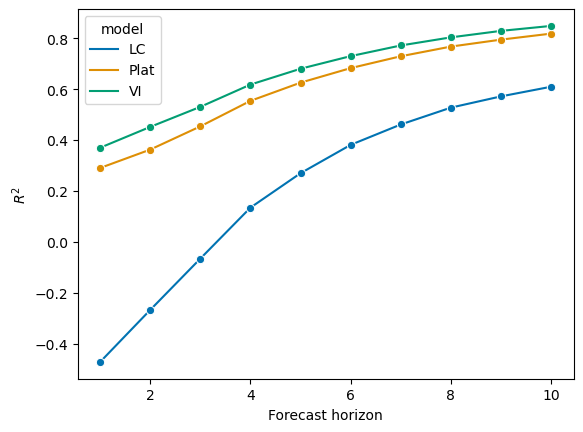

In [198]:
sns.color_palette("colorblind")

sns.lineplot(x = 'Forecast horizon', y = 'R2', hue = 'model', data = score_all, marker='o')
fig_path = fig_dir + 'model_comparison.pdf'
ax.legend().set_title('')
plt.ylabel(r'$R^2$')

fig_path = fig_dir + 'model_comparison.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi = 300)

In [199]:
score_all.groupby('model').mean()

,Forecast horizon,Log score,naive,saturated,R2,relative
model,,,,,,
LC,5.5,-608.482678,-794.965564,-344.072618,0.215000,1.769242
Plat,5.5,-474.918951,-794.965564,-344.072618,0.608068,1.380638
VI,5.5,-455.137394,-794.965564,-344.072618,0.663549,1.323074
